<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-DADOS-02/blob/main/Gustavo_Bezerra_2_HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Despesas Médicas do Seguro de Saúde

Este conjunto de dados *insurance.csv* representa despesas médicas de indivíduos nos EUA.<br/>
Predizer despesas médicas é de fundamental importância para uma empresa de seguros de saúde. É tambem de interesse de cada pessoa.

#### Vamos realizar uma analise exploratória dos dados (EDA) utilizado o Seaborn

- age: idade do beneficiário primário.
- sex: empreiteiro de seguros gênero feminino, masculino.
- bmi: Índice de massa corporal (IMC),  a relação entre altura e peso é dada por (kg / m ^ 2), idealmente o valor deve ficar entre 18,5 a 24,9.
- children: Número de dependentes / Número de crianças cobertas pelo seguro de saúde.
- smoker: A pessoa é fumante ou não.
- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste.
- expenses: custos médicos individuais faturados pelo seguro de saúde.

###Importe as bibliotecas que vamos precisar para gerar nossos gráficos, tabelas e insights

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Carregue/Leia o DataFrame

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/Diabetes-Classification/main/insurance.csv')

###Mostre na tela as primeiras cinco linhas do dataframe

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


###Mostre na tela as informações gerais do dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Somando os valores nulos ou ausentes da amostra
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

###Mostre na tela um resumo estatístico dos dados numéricos

In [6]:
#Descrição dos valores numéricos
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Qual o número de fumantes e não fumantes? Se preferir, plote esses números num gráfico

In [9]:
#Demostrando a coluna fumante
df.groupby(['smoker']).count()

,age,sex,bmi,children,region,expenses
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


<Axes: xlabel='smoker', ylabel='count'>

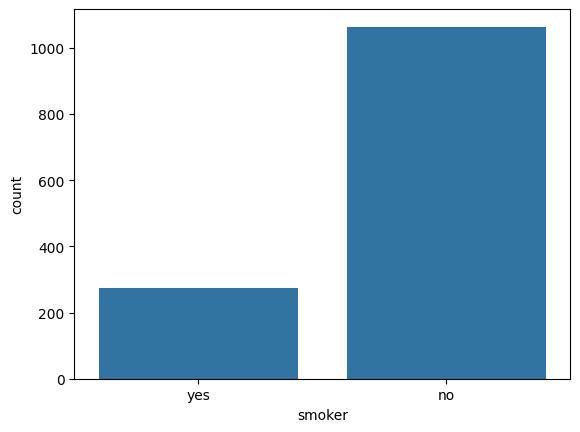

In [10]:
#Relação entre o total de fumante
sns.countplot(x= 'smoker', data=df)

### Há mais homens ou mulheres?

In [ ]:
df.groupby(['sex']).count()

,age,bmi,children,smoker,region,expenses
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


<Axes: xlabel='sex', ylabel='count'>

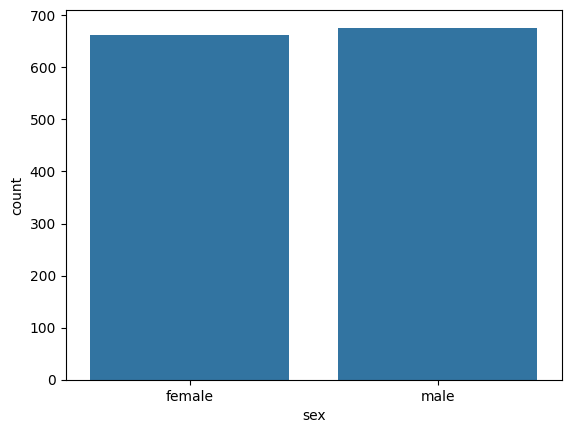

In [ ]:
sns.countplot(x='sex', data=df)

### E se fizermos distinção de gênero considerando os fumantes? Haverá mais homens que fumam ou mulheres fumantes?

In [16]:
#Agrupando duas colunas
df.groupby(['sex','smoker']).count()

age  bmi  children  region  expenses
sex    smoker                                      
female no      547  547       547     547       547
       yes     115  115       115     115       115
male   no      517  517       517     517       517
       yes     159  159       159     159       159

<Axes: xlabel='smoker', ylabel='count'>

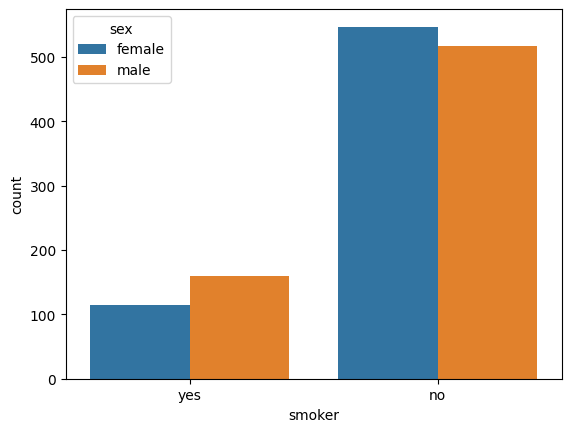

In [12]:
sns.countplot(x='smoker',hue='sex', data=df)

In [13]:
#Montando uma relação somente com os fumantes
df_smoker = df[df['smoker'] == 'yes']

In [14]:
df_smoker.shape

(274, 7)

<Axes: xlabel='smoker', ylabel='count'>

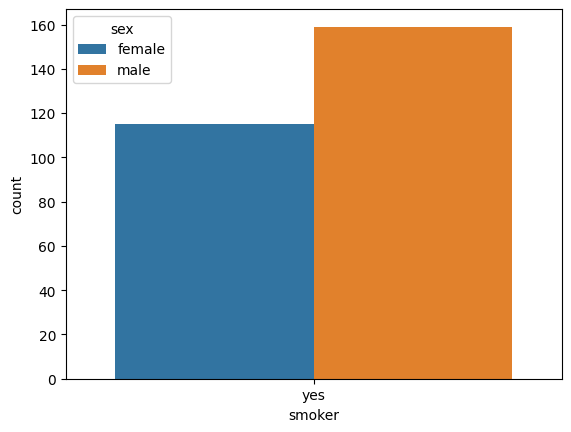

In [15]:
sns.countplot(x='smoker', hue='sex', data=df_smoker)

### Como os dados da idade se distribuem? E os gastos?

In [17]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

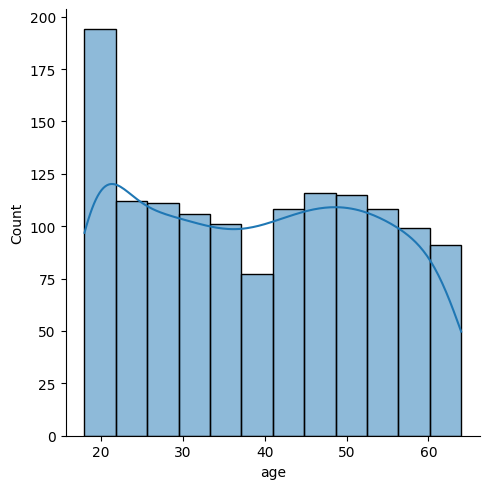

In [18]:
sns.displot(df['age'], kde = True);

In [ ]:
df['expenses'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

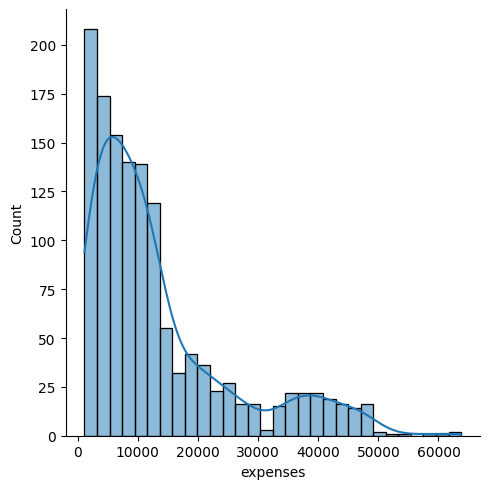

In [ ]:
sns.displot(df['expenses'], kde=True);

### Quem gasta mais com o plano de saúde? Fumantes ou não fumantes?

In [20]:
#Realizando descrição de dados entre colunas
df.groupby('smoker')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


- Valor total

<Axes: xlabel='smoker', ylabel='expenses'>

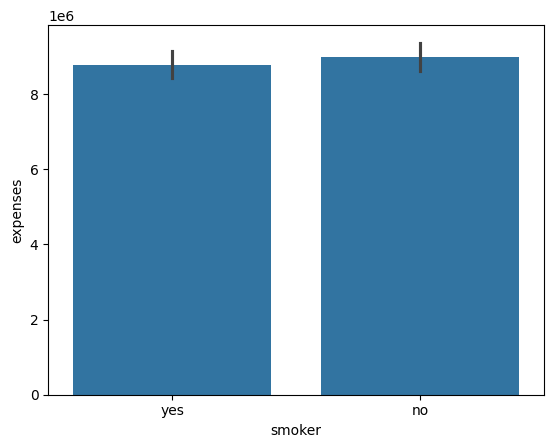

In [22]:
#Fazendo uma comparação com a soma
sns.barplot(x="smoker", y="expenses", data=df, estimator=np.sum)

- Valor médio

<Axes: xlabel='smoker', ylabel='expenses'>

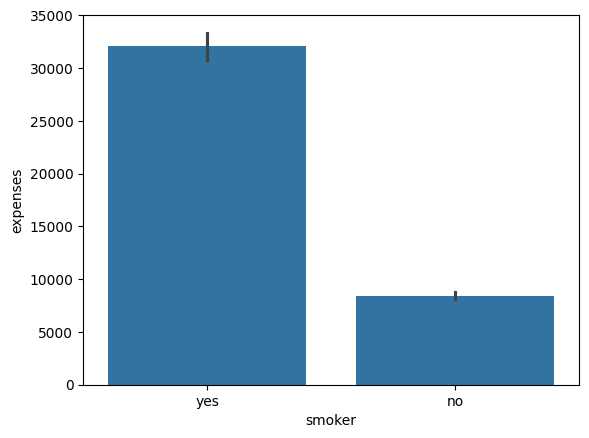

In [23]:
#Fazendo uma comparação com a média
sns.barplot(x='smoker', y='expenses', data=df, estimator=np.mean)

### Vamos verificar a correlação dos dados

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
#Filtrando os dados numéricos para a correlação
df_filter = df[['age','bmi','children', 'expenses']]

In [33]:
df_filter.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [34]:
df_filter.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

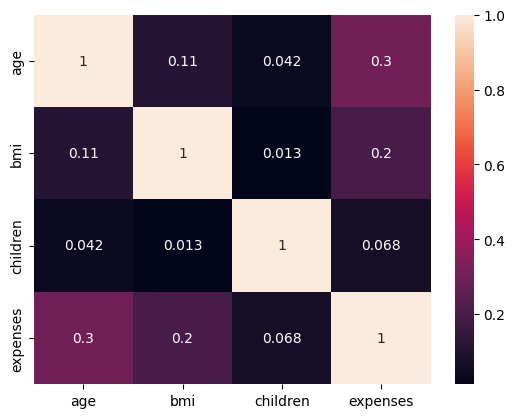

In [35]:
sns.heatmap(df_filter.corr(), annot = True)

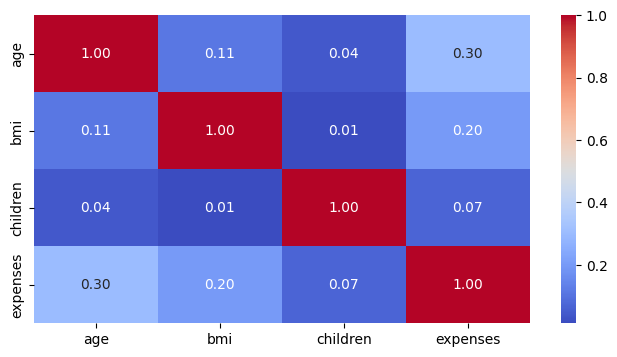

In [36]:
corr = df_filter.corr(method='pearson')

# heatmap - gráfico de calor
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

###Utilize o pairplot para uma visualização diferente. Se preferir, filtre as variáveis que prefere ver a correlação, o pairplot pode demorar para rodar com todas as variáveis juntas.

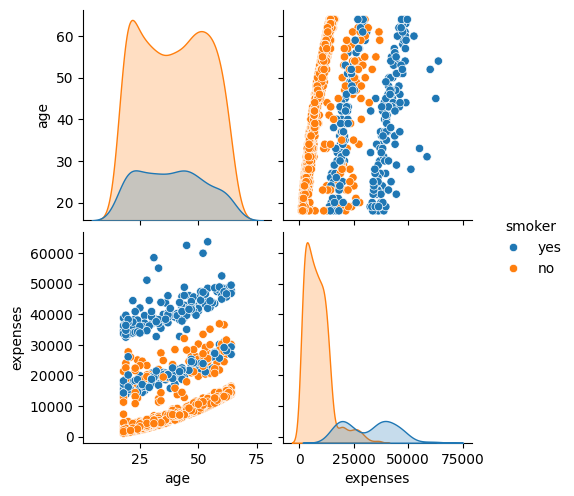

In [39]:
sns.pairplot(df[['age', 'expenses', 'smoker']], hue='smoker')

<Axes: xlabel='expenses', ylabel='age'>

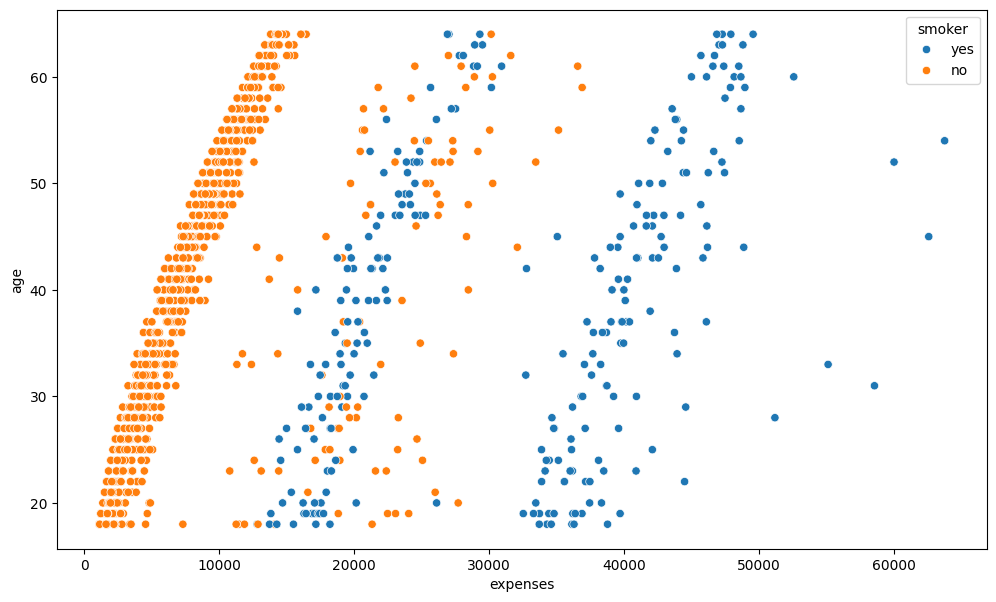

In [44]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="expenses", y="age", hue="smoker", data=df)

<Axes: xlabel='bmi', ylabel='expenses'>

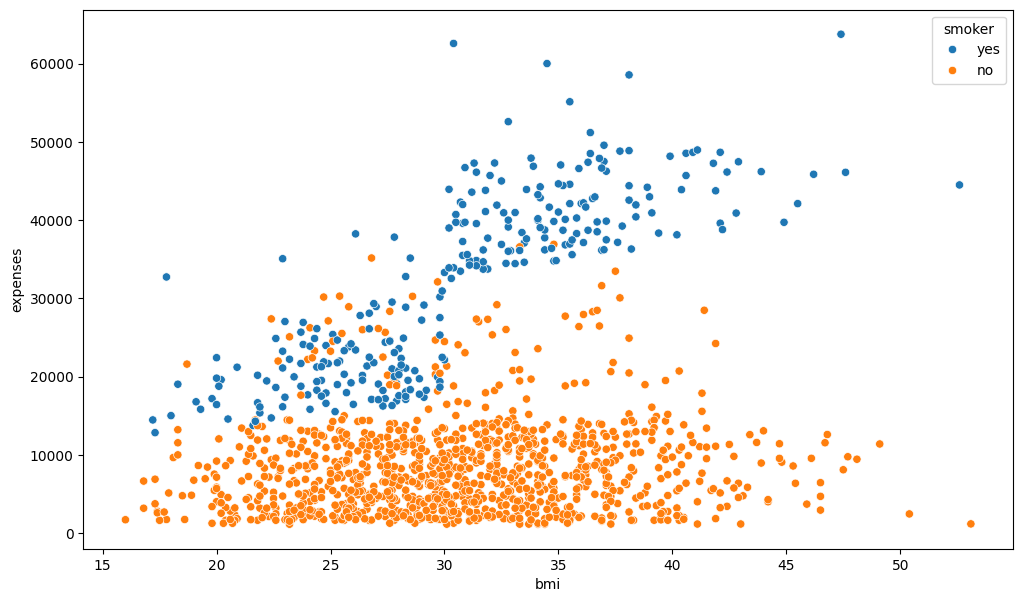

In [40]:
# relação entre a variável x e y
plt.figure(figsize=(12, 7))
sns.scatterplot(x="bmi", y="expenses", hue="smoker", data=df)

### Qual a relação dos gastos com o IMC fazendo distinção dos fumantes?

### Referência

- https://seaborn.pydata.org/examples/index.html